### MINI PROJECT 

###### By: Agnes Muthusi

### Data Loading and clean-up (Analysis)

In [1]:
##import modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import seaborn as sns; sns.set()

In [2]:
#Read data with pandas read.csv method
df=pd.read_csv('C:\\Users\\maina\\Documents\\Digital Academy\\Data Science\\DS_Crash_Course_labs\\Annual_Summary_of_Horticultural_Exports_Flowers_Fruit_and_Vegetables_between_20052014.csv', index_col=None, header=0)

#use pandas head/tail/sample method to have a look at the columns in the dataframe
df.head(2)

,Commodity,Type,Kgs,Kshs,Date,OBJECTID
0,Flowers,ALSTROMERIA,949410.06,192174616.5,01/01/2005 12:00:00 AM,0
1,Flowers,ARABICUM,164136.06,30285412.0,01/01/2005 12:00:00 AM,1


In [3]:
#To get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
Commodity    170 non-null object
Type         170 non-null object
Kgs          170 non-null float64
Kshs         170 non-null float64
Date         170 non-null object
OBJECTID     170 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.0+ KB


In [4]:
#Convert variable to be useful.
df['Date']=pd.to_datetime(df['Date'])
df["Commodity"] = df["Commodity"].astype('category')
df["Type"] = df["Type"].astype('category')
df.dtypes

Commodity          category
Type               category
Kgs                 float64
Kshs                float64
Date         datetime64[ns]
OBJECTID              int64
dtype: object

In [5]:
#To generate descriptive of the dataset
df.describe(include='all')

#From .describe method it posssible to tell:
#1. The frequency of export for each commodity and type i.e(70 and 10respectively.) 
#2. Top export commodity (vegetables) and its type (roses)
#3. There are three unique commodities.


,Commodity,Type,Kgs,Kshs,Date,OBJECTID
count,170,170,1.700000e+02,1.700000e+02,170,170.000000
unique,3,17,NaN,NaN,10,NaN
top,Vegetables,ROSES,NaN,NaN,2005-01-01 00:00:00,NaN
freq,70,10,NaN,NaN,17,NaN
first,NaN,NaN,NaN,NaN,2005-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2014-01-01 00:00:00,NaN
mean,NaN,NaN,8.143009e+06,2.652703e+09,NaN,84.500000
std,NaN,NaN,1.797833e+07,6.743005e+09,NaN,49.218899
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000
25%,NaN,NaN,5.989391e+05,1.388786e+08,NaN,42.250000


In [6]:
##To find total null column entries
df.isnull().sum()

Commodity    0
Type         0
Kgs          0
Kshs         0
Date         0
OBJECTID     0
dtype: int64

In [7]:
#To rearrange columns of the dataframe
df = df.reindex(['OBJECTID', 'Commodity', 'Type', 'Kgs', 'Kshs', 'Date'], axis=1)
df.columns

Index(['OBJECTID', 'Commodity', 'Type', 'Kgs', 'Kshs', 'Date'], dtype='object')

In [8]:
#Create a column of Month of Export
df["Month"]=pd.DatetimeIndex(df["Date"]).month
df.sample()

,OBJECTID,Commodity,Type,Kgs,Kshs,Date,Month
25,25,Flowers,CUTTINGS,1900742.0,7.554153e+09,2008-01-01,1


In [9]:
#Create a column of Year of Export
df["Year"]=pd.DatetimeIndex(df["Date"]).year
df.sample(2)

,OBJECTID,Commodity,Type,Kgs,Kshs,Date,Month,Year
55,55,Flowers,MIXED FLOWERS,636012.74,230698928.0,2012-01-01,1,2012
130,130,Vegetables,BEANS RUNNER,4533819.98,327402642.0,2009-01-01,1,2009


In [10]:
Vegetables=df.loc[df.Commodity == "Vegetables"]
Vegetables.sample(4)

,OBJECTID,Commodity,Type,Kgs,Kshs,Date,Month,Year
143,143,Vegetables,BEANS X-FINE,8448789.98,2.609271e+09,2011-01-01,1,2011
148,148,Vegetables,OKRA,224646.60,4.639745e+07,2011-01-01,1,2011
110,110,Vegetables,PEAS SNAP,1756248.25,5.132210e+08,2006-01-01,1,2006
132,132,Vegetables,PEAS SNOW,1697409.66,5.622390e+08,2009-01-01,1,2009


In [11]:
Fruits=df.loc[df.Commodity == "Fruits"]
Fruits.tail()

,OBJECTID,Commodity,Type,Kgs,Kshs,Date,Month,Year
95,95,Fruits,PASSION FRUIT,761925.99,2.370757e+08,2013-01-01,1,2013
96,96,Fruits,MANGO,6430055.02,1.039916e+09,2013-01-01,1,2013
97,97,Fruits,AVOCADO,25693895.45,2.837485e+09,2014-01-01,1,2014
98,98,Fruits,PASSION FRUIT,652254.36,1.877520e+08,2014-01-01,1,2014
99,99,Fruits,MANGO,7438780.39,1.111785e+09,2014-01-01,1,2014


In [12]:
Flowers=df.loc[df.Commodity == "Flowers"]
Flowers.head()

,OBJECTID,Commodity,Type,Kgs,Kshs,Date,Month,Year
0,0,Flowers,ALSTROMERIA,949410.06,192174616.5,2005-01-01,1,2005
1,1,Flowers,ARABICUM,164136.06,30285412.0,2005-01-01,1,2005
2,2,Flowers,"CARNATIONS, STD",2599236.25,707280768.0,2005-01-01,1,2005
3,3,Flowers,"CARNATIONS, SPRAY",936688.00,164790960.0,2005-01-01,1,2005
4,4,Flowers,CUTTINGS,469077.50,659962176.0,2005-01-01,1,2005


### Data Visualization

Text(0.5, 1.0, 'Total count of Commodities Exported.')

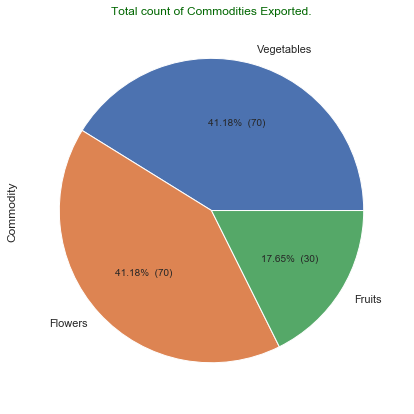

In [13]:
#Pie chart to show total number of Commodities export and their percentages.
counts = df['Commodity'].value_counts()
fig=plt.figure(figsize=(7,7))
ax=fig.gca()
def make_autopct(counts):
    def my_autopct(pct):
        total = sum(counts)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
counts.plot.pie(autopct=make_autopct(counts), startangle=0, ax=ax)
ax.set_title('Total count of Commodities Exported.', color='#006600')

Text(0, 0.5, 'Number of Kgs Exported')

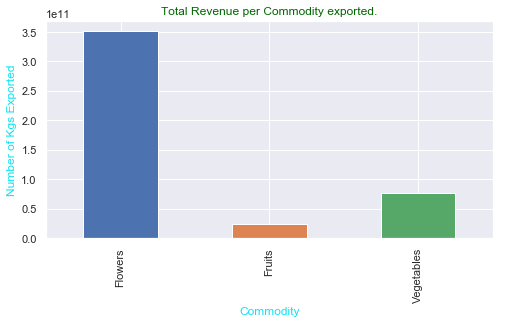

In [14]:
#Bar plot to show total Revenue per Commodity exported
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
df.groupby("Commodity")['Kshs'].sum().plot(kind='bar')
ax.set_title('Total Revenue per Commodity exported.', color='#006600')
ax.set_xlabel('Commodity', color="#0de3f4")
ax.set_ylabel('Number of Kgs Exported', color='#0de3f4')

Text(0, 0.5, 'Kgs Exported')

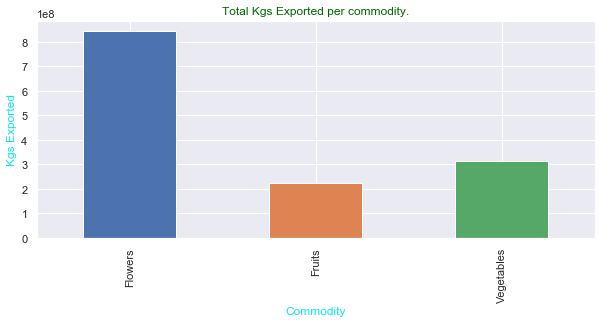

In [15]:
#Total Kgs exported per Commodity.
fig=plt.figure(figsize=(10,4))
ax=fig.gca()
df.groupby("Commodity")['Kgs'].sum().plot(kind='bar')
ax.set_title('Total Kgs Exported per commodity.', color='#006600')
ax.set_xlabel('Commodity', color='#0de3f4')
ax.set_ylabel('Kgs Exported', color="#0de3f4")

Text(0, 0.5, 'Total Kgs Exported')

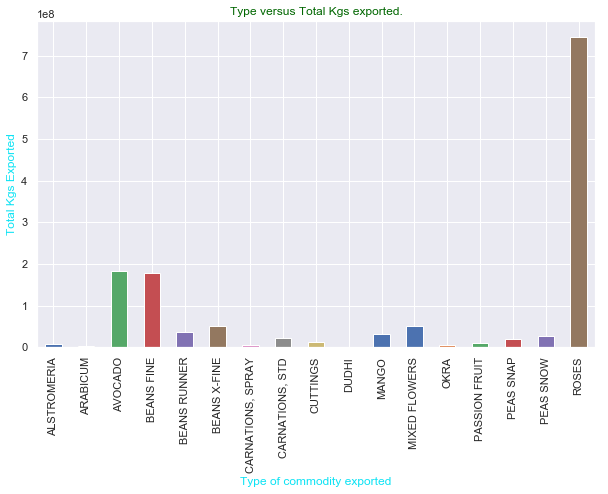

In [16]:
fig=plt.figure(figsize=(10,6))
ax=fig.gca()
df.groupby("Type")['Kgs'].sum().plot(kind='bar')
ax.set_title('Type versus Total Kgs exported.', color='#006600')
ax.set_xlabel('Type of commodity exported', color='#0de3f4')
ax.set_ylabel('Total Kgs Exported', color="#0de3f4")


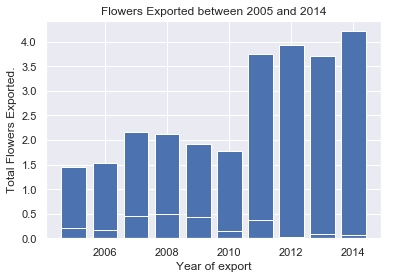

In [17]:
plt.bar(Flowers.Year,Flowers.Kshs/10**10)
plt.title("Flowers Exported between 2005 and 2014")
plt.xlabel("Year of export")
plt.ylabel("Total Flowers Exported.")
plt.show()

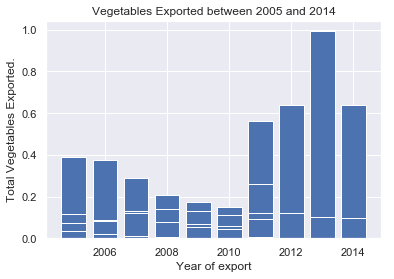

In [18]:
plt.bar(Vegetables.Year,Vegetables.Kshs/10**10)
plt.title("Vegetables Exported between 2005 and 2014")
plt.xlabel("Year of export")
plt.ylabel("Total Vegetables Exported.")
plt.show()

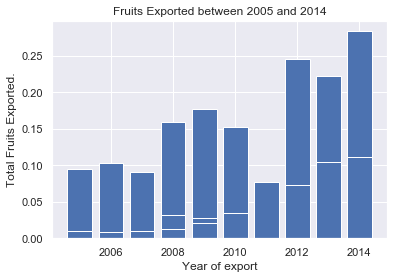

In [19]:
plt.bar(Fruits.Year,Fruits.Kshs/10**10)
plt.title("Fruits Exported between 2005 and 2014")
plt.xlabel("Year of export")
plt.ylabel("Total Fruits Exported.")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Revenue in Kshs')

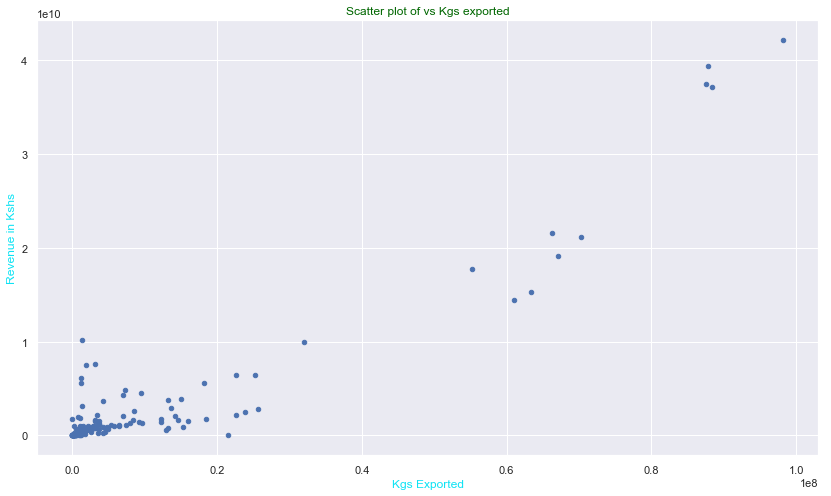

In [20]:
# Violin plot to show relationship between No of Kgs for each year
fig=plt.figure(figsize=(14,8))
ax=fig.gca()#define the axis
df.plot.scatter(x='Kgs', y='Kshs', ax=ax)
ax.set_title('Scatter plot of vs Kgs exported', color='#006600')
ax.set_xlabel('Kgs Exported', color="#0de3f4")
ax.set_ylabel('Revenue in Kshs', color="#0de3f4")

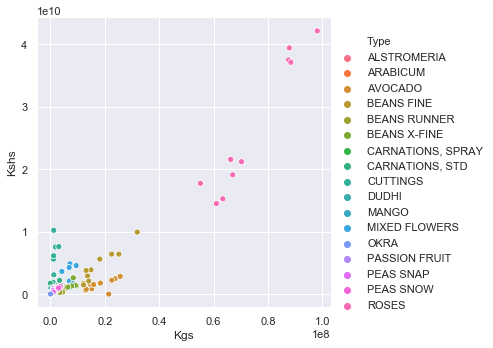

In [21]:
sns.set(style="darkgrid")
sns.relplot(x='Kgs',y='Kshs',hue='Type', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Kgs Exported in one year for all commodities')

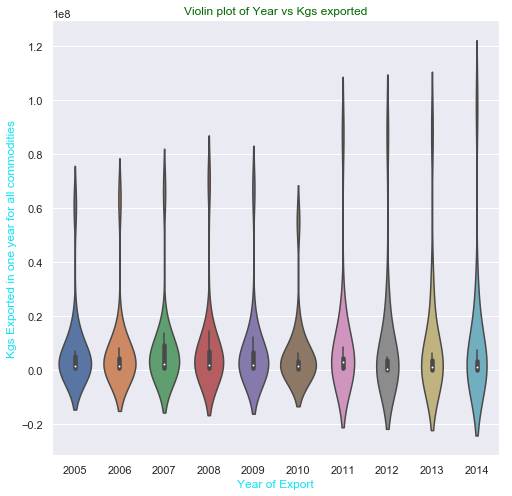

In [22]:
# Violin plot to show relationship between No of Kgs for each year
fig=plt.figure(figsize=(8,8))
ax=fig.gca()#define the axis
sns.set_style('whitegrid')
sns.violinplot(x='Year', y='Kgs' ,bw=.5, data=df, ax=ax,)
ax.set_title('Violin plot of Year vs Kgs exported', color='#006600')
ax.set_xlabel('Year of Export', color="#0de3f4")
ax.set_ylabel('Kgs Exported in one year for all commodities', color="#0de3f4")

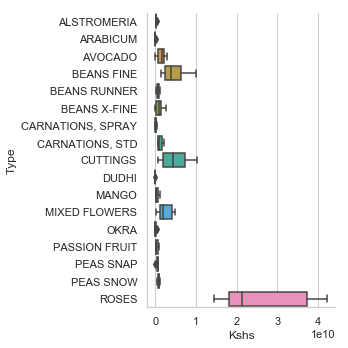

In [23]:
sns.catplot(x="Kshs", y="Type",kind="box", data=df)

In [24]:
sns.catplot(x="Kshs", y="Type",kind="box", hue="Commodity" data=df)

SyntaxError: invalid syntax (<ipython-input-24-accd46b0d992>, line 1)

In [ ]:
#Drop ObjectId and find correlation
drop_col=['OBJECTID']
df.drop(drop_col, axis=1, inplace=True)

corr = df.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr)

In [ ]:
sns.lmplot(x='Kgs',y='Kshs',hue='Commodity',data=df)